# Saugvermögen der Pumpen

In [242]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import pandas as pd

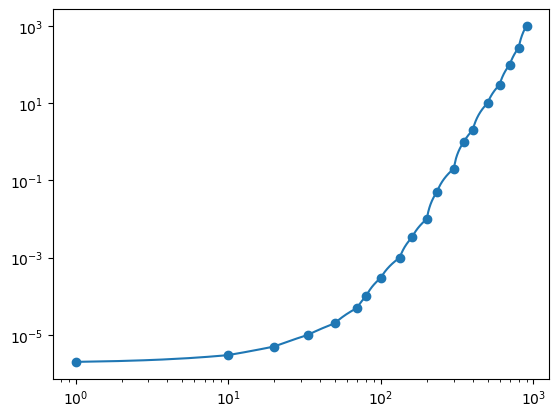

In [243]:
# Erstelle mir aus Kalibriergrafik Funktion zum Umrechnen der Werte. Nähere durch lineares Interpolieren.
# Angesichts der erwartbaren Ablesefehler scheint dies vertretbar.

posanzeige = np.array([1e0,1e1,2e1,3.33e1,5e1,7e1,8e1,1e2,1.33e2,1.6e2,2e2,2.33e2,3e2,3.5e2,4e2,5e2,6e2,7e2,8e2,9e2])
gasfluss = np.array([2e-6,3e-6,5e-6,1e-5,2e-5,5e-5,1e-4,3e-4,1e-3,3.33e-3,1e-2,5e-2,2e-1,1e0,2e0,1e1,3e1,1e2,2.7e2,1e3])

# def pos_to_gas(pos,A,B,C,D):
    # return A*np.exp(B*(pos-C))+D

# popt, pcov = curve_fit(pos_to_gas, posanzeige, gasfluss, (1,1,))
# A, B, C, D = popt

pos_to_gas = interp1d(posanzeige,gasfluss,kind='linear')

x = np.linspace(1e0,9e2,1000)
# y = pos_to_gas(x,A,B,C,D)
y = pos_to_gas(x)

plt.scatter(posanzeige,gasfluss)
plt.plot(x,y)
plt.xscale('log')
plt.yscale('log')
# print(y)

In [244]:
class gas:
    def __init__(self,path,label) -> None:
        self.df=pd.read_csv(path)
        self.df.astype(float)
        self.label=label

def torr_to_mbar(torr):
    return torr*1.33322


Drehschieberpumpe (Nutze Baratron 1):

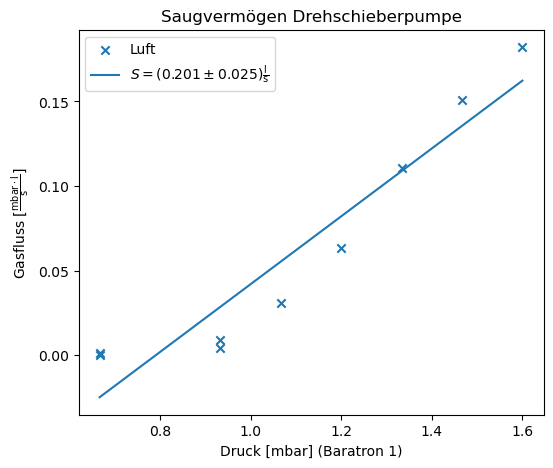

In [245]:
luft = gas('data/vakuumeter/Luft.csv','Luft')
helium = gas('data/vakuumeter/Helium.csv','Helium')

def lin(x,m,b):
    return m*x+b

fig, ax = plt.subplots(figsize=(6,5))

start = 18
stop = 27
x=torr_to_mbar(luft.df['Bara1'][start:stop])
y=pos_to_gas(luft.df['digitaler Gasfluss'][start:stop])
ax.scatter(x,y,marker='x',label='Luft')
#ax.errorbar(x,y,linestyle='None')

popt, pcov = curve_fit(lin,x[:],y[:])
m, b = popt
S = round(m,3)
dS = round(np.sqrt(pcov[0][0]),3)
plt.plot(x,lin(x,m,b),label=f'$S=({S}\pm{dS})'+r'\frac{\mathrm{l}}{\mathrm{s}}$')

# start = 12
# stop = 18
# x=torr_to_mbar(helium.df['Bara1'][start:stop])
# y=pos_to_gas(helium.df['digitaler Gasfluss'][start:stop])
# ax.scatter(x,y,marker='x',label='Helium')
# #ax.errorbar(x,y,xerr=0.1,linestyle='None')

# popt, pcov = curve_fit(lin,x,y)
# m, b = popt
# plt.plot(x,lin(x,m,b))



plt.xlabel('Druck [mbar] (Baratron 1)')
plt.ylabel(r'Gasfluss $[\frac{\mathrm{mbar}\cdot\mathrm{l}}{\mathrm{s}}]$')
plt.title('Saugvermögen Drehschieberpumpe')
plt.legend()
plt.savefig('figures/saugvermögen/drehLuft.pdf')

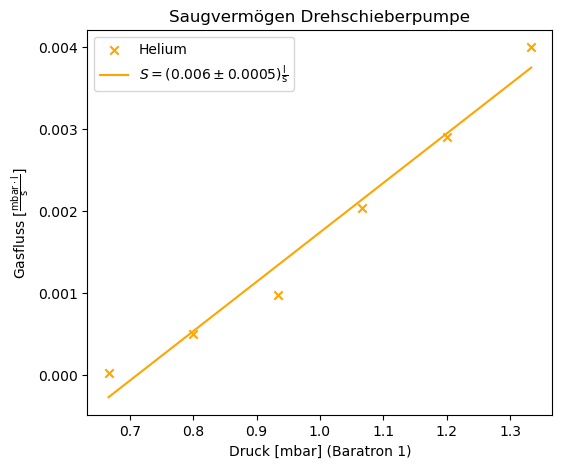

In [246]:
fig, ax = plt.subplots(figsize=(6,5))

start = 12
stop = 18
x=torr_to_mbar(helium.df['Bara1'][start:stop])
y=pos_to_gas(helium.df['digitaler Gasfluss'][start:stop])
ax.scatter(x,y,marker='x',label='Helium',c='orange')
#ax.errorbar(x,y,xerr=0.1,linestyle='None')

popt, pcov = curve_fit(lin,x[:],y[:])
m, b = popt
S = round(m,4)
dS = round(np.sqrt(pcov[0][0]),4)
plt.plot(x,lin(x,m,b),c='orange',label=f'$S=({S}\pm{dS})'+r'\frac{\mathrm{l}}{\mathrm{s}}$')


plt.xlabel('Druck [mbar] (Baratron 1)')
plt.ylabel(r'Gasfluss $[\frac{\mathrm{mbar}\cdot\mathrm{l}}{\mathrm{s}}]$')
plt.title('Saugvermögen Drehschieberpumpe')
plt.legend()
plt.savefig('figures/saugvermögen/drehHe.pdf')

Turbomolekularpumpe (Nutze Baratron 2):

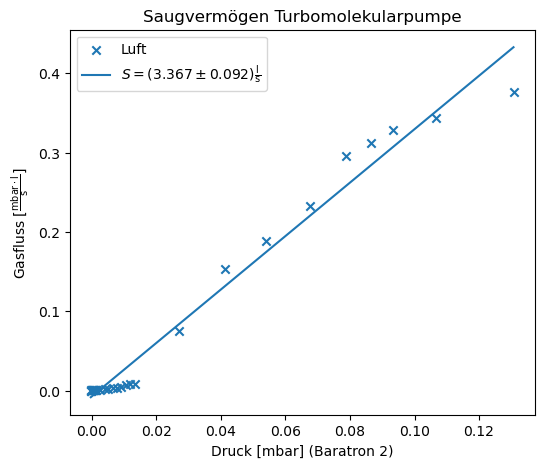

In [247]:
fig, ax = plt.subplots(figsize=(6,5))

start = 27
stop = len(luft.df['Bara2'])
x=torr_to_mbar(luft.df['Bara2'][start:stop])
y=pos_to_gas(luft.df['digitaler Gasfluss'][start:stop])
ax.scatter(x,y,marker='x',label='Luft')
#ax.errorbar(x,y,linestyle='None')

popt, pcov = curve_fit(lin,x[:],y[:])
m, b = popt
S = round(m,3)
dS = round(np.sqrt(pcov[0][0]),3)
plt.plot(x,lin(x,m,b),label=f'$S=({S}\pm{dS})'+r'\frac{\mathrm{l}}{\mathrm{s}}$')

# start = 18
# stop = len(helium.df['Bara2'])
# x=torr_to_mbar(luft.df['Bara2'][start:stop])
# y=pos_to_gas(helium.df['digitaler Gasfluss'][start:stop])
# ax.scatter(x,y,marker='x',label='Helium')
# #ax.errorbar(x,y,xerr=0.1,linestyle='None')

# popt, pcov = curve_fit(lin,x,y)
# m, b = popt
# plt.plot(x,lin(x,m,b))


plt.xlabel('Druck [mbar] (Baratron 2)')
plt.ylabel(r'Gasfluss $[\frac{\mathrm{mbar}\cdot\mathrm{l}}{\mathrm{s}}]$')
plt.title('Saugvermögen Turbomolekularpumpe')
plt.legend()
plt.savefig('figures/saugvermögen/turboLuft.pdf')

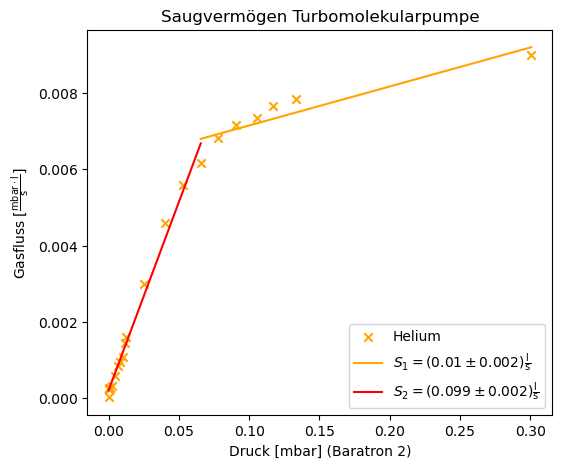

In [248]:
fig, ax = plt.subplots(figsize=(6,5))

start = 18
stop = len(helium.df['Bara2'])
x=torr_to_mbar(helium.df['Bara2'][start:stop])
y=pos_to_gas(helium.df['digitaler Gasfluss'][start:stop])
ax.scatter(x,y,marker='x',label='Helium',c='orange')
#ax.errorbar(x,y,xerr=0.1,linestyle='None')

popt, pcov = curve_fit(lin,x[:7],y[:7])
m, b = popt
S = round(m,3)
dS = round(np.sqrt(pcov[0][0]),3)
plt.plot(x[:7],lin(x,m,b)[:7],c='orange',label=f'$S_1=({S}\pm{dS})'+r'\frac{\mathrm{l}}{\mathrm{s}}$')

popt, pcov = curve_fit(lin,x[6:],y[6:])
m, b = popt
S = round(m,3)
dS = round(np.sqrt(pcov[0][0]),3)
plt.plot(x[6:],lin(x,m,b)[6:],c='red',label=f'$S_2=({S}\pm{dS})'+r'\frac{\mathrm{l}}{\mathrm{s}}$')

plt.xlabel('Druck [mbar] (Baratron 2)')
plt.ylabel(r'Gasfluss $[\frac{\mathrm{mbar}\cdot\mathrm{l}}{\mathrm{s}}]$')
plt.title('Saugvermögen Turbomolekularpumpe')
plt.legend()
plt.savefig('figures/saugvermögen/turboHe.pdf')